# Hospital Procurement Data Analysis
- By Valentine Ezenwanne

## Background
- The Federal Ministry of Health, requires efficient management of equipment procurement to ensure the availability of necessary resources for patient care. Hospital equipment ranges from essential medical devices like operating tables and defibrillators to specialized equipment such as X-ray machines and microscopes. Efficient procurement practices can lead to cost savings, improved equipment quality, and better patient outcomes.

## Objective
- The objective of this project is to analyze the procurement data of hospitals to identify patterns, trends, and opportunities for optimization in equipment procurement processes. The analysis will focus on understanding equipment procurement patterns, supplier performance, cost optimization opportunities, and equipment maintenance requirements.

### Importing the libraries

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

### Load the dataset

In [2]:
#load the dataset
df = pd.read_csv('hospital procurement.csv', header=1)

In [3]:
#display the first few lines
df.head(3)

,Unnamed: 0,Serial No,Hospital,State,Location,Department,Equipment,Quantity,Unit Price (USD),Supplier,Supplier Contact,Supplier Phone,Supplier Email,Supplier Country,Date Ordered,Date Delivered,Warranty Period (Months),Maintenance Cost (USD/year),Installation Cost (USD),Equipment Condition,Unnamed: 20
0,NaN,-----------,----------------,---------,-------------,----------------,---------------,----------,------------------,----------------,------------------,----------------,----------------------,-----------------,--------------,----------------,--------------------------,------------------------------,-------------------------,---------------------,NaN
1,NaN,1,Lagos General,Lagos,Lagos City,Cardiology,ECG Machine,2,5000,MedTech Inc.,John Doe,+1234567890,john@medtech.com,USA,2024-03-15,2024-04-10,24,1000,500,New,NaN
2,NaN,2,Abuja Hospital,Abuja,Abuja City,Radiology,MRI Machine,1,15000,Imagix,Jane Smith,+9876543210,jane@imagix.co.uk,UK,2024-02-20,2024-03-18,36,2000,1000,New,NaN


### Data Wrangling

In [4]:
#dropping the first row since it contain literal '---' and NaN
df.drop(0, axis=0, inplace=True)

In [5]:
#display the column names
df.columns

Index(['Unnamed: 0', ' Serial No ', ' Hospital        ', ' State   ',
       ' Location    ', ' Department     ', ' Equipment     ', ' Quantity ',
       ' Unit Price (USD) ', ' Supplier       ', ' Supplier Contact ',
       ' Supplier Phone ', ' Supplier Email       ', ' Supplier Country ',
       ' Date Ordered ', ' Date Delivered ', ' Warranty Period (Months) ',
       ' Maintenance Cost (USD/year) ', ' Installation Cost (USD) ',
       ' Equipment Condition ', 'Unnamed: 20'],
      dtype='object')

- Some columns are unncessary and contain empty values
- Some column names have white spaces

In [6]:
#dropping unnecessary columns
df.drop(['Unnamed: 0', 'Unnamed: 20'], axis=1, inplace=True)

In [7]:
#confirming the columns have been dropped
df.columns

Index([' Serial No ', ' Hospital        ', ' State   ', ' Location    ',
       ' Department     ', ' Equipment     ', ' Quantity ',
       ' Unit Price (USD) ', ' Supplier       ', ' Supplier Contact ',
       ' Supplier Phone ', ' Supplier Email       ', ' Supplier Country ',
       ' Date Ordered ', ' Date Delivered ', ' Warranty Period (Months) ',
       ' Maintenance Cost (USD/year) ', ' Installation Cost (USD) ',
       ' Equipment Condition '],
      dtype='object')

In [8]:
#removing whitespaces in the column name
df.columns = df.columns.str.strip()
df.columns

Index(['Serial No', 'Hospital', 'State', 'Location', 'Department', 'Equipment',
       'Quantity', 'Unit Price (USD)', 'Supplier', 'Supplier Contact',
       'Supplier Phone', 'Supplier Email', 'Supplier Country', 'Date Ordered',
       'Date Delivered', 'Warranty Period (Months)',
       'Maintenance Cost (USD/year)', 'Installation Cost (USD)',
       'Equipment Condition'],
      dtype='object')

In [9]:
#checking the shape of the dataset
df.shape

(267, 19)

- The dataset contain 267 records and 19 columns

In [10]:
#checking for missing values
df.isna().sum()

Serial No                      0
Hospital                       0
State                          0
Location                       0
Department                     0
Equipment                      0
Quantity                       0
Unit Price (USD)               0
Supplier                       0
Supplier Contact               0
Supplier Phone                 0
Supplier Email                 0
Supplier Country               0
Date Ordered                   0
Date Delivered                 0
Warranty Period (Months)       0
Maintenance Cost (USD/year)    0
Installation Cost (USD)        0
Equipment Condition            0
dtype: int64

- There are no missing values

In [11]:
#checking for duplicates
df.duplicated().sum()

3

- There are three duplicates

In [12]:
#filtering the duplicates
df[df.duplicated()]

,Serial No,Hospital,State,Location,Department,Equipment,Quantity,Unit Price (USD),Supplier,Supplier Contact,Supplier Phone,Supplier Email,Supplier Country,Date Ordered,Date Delivered,Warranty Period (Months),Maintenance Cost (USD/year),Installation Cost (USD),Equipment Condition
145,-----------,----------------------------,-------------,-------------------,------------------,-----------------------,----------,------------------,-------------------,------------------,----------------,------------------------,-----------------,--------------,----------------,--------------------------,------------------------------,-------------------------,---------------------
166,-----------,----------------------------,-------------,-------------------,------------------,-----------------------,----------,------------------,-------------------,------------------,----------------,------------------------,-----------------,--------------,----------------,--------------------------,------------------------------,-------------------------,---------------------
217,-----------,----------------------------,-------------,-------------------,------------------,-----------------------,----------,------------------,-------------------,------------------,----------------,------------------------,-----------------,--------------,----------------,--------------------------,------------------------------,-------------------------,---------------------


In [13]:
#dropping the rows which have these duplicates since they are not valid data

df.drop([145,166,217], axis=0, inplace=True)

In [14]:
#confirming that there is no duplicates
df.duplicated().sum()

0

In [15]:
#Checking for datatype
df.dtypes

Serial No                      object
Hospital                       object
State                          object
Location                       object
Department                     object
Equipment                      object
Quantity                       object
Unit Price (USD)               object
Supplier                       object
Supplier Contact               object
Supplier Phone                 object
Supplier Email                 object
Supplier Country               object
Date Ordered                   object
Date Delivered                 object
Warranty Period (Months)       object
Maintenance Cost (USD/year)    object
Installation Cost (USD)        object
Equipment Condition            object
dtype: object

- All the data are of the object datatypes, but some should be integers and date type

Noting columns and the datatype they should be
- **Quantity** should be **integer**
- **Unit Price (USD)** should be **integer**
- **Date Ordered** should be **date type**
- **Date Delivered** should be **date type**
- **Warranty Period** should be **integer**
- **Maintenance Cost** should be **integer**
- **Installation Cost** should be **integer**

In [16]:
#checking unique values in the Quantity
df['Quantity'].value_counts()

Quantity
 1            126
 2             40
 3             29
 4             17
 5             14
 6             10
 7              8
----------      4
 8              4
 1              3
 1              2
 10             1
 1              1
 2              1
 1              1
 3              1
 2              1
 9              1
Name: count, dtype: int64

- The column contain a literal instead of number

In [17]:
#filter records where quantity is not an integer
df[df['Quantity'].str.contains('---')]

,Serial No,Hospital,State,Location,Department,Equipment,Quantity,Unit Price (USD),Supplier,Supplier Contact,Supplier Phone,Supplier Email,Supplier Country,Date Ordered,Date Delivered,Warranty Period (Months),Maintenance Cost (USD/year),Installation Cost (USD),Equipment Condition
31,-----------,-------------------,------------,-----------------,-----------------,--------------------,----------,------------------,-------------------,------------------,----------------,-------------------------,-----------------,--------------,----------------,--------------------------,------------------------------,-------------------------,---------------------
52,-----------,-------------------,-------------,-----------------,-----------------,----------------------,----------,------------------,-------------------,------------------,----------------,-------------------------,-----------------,--------------,----------------,--------------------------,------------------------------,-------------------------,---------------------
91,-----------,-------------------------,-------------,-------------------,------------------,-----------------------,----------,------------------,-------------------,------------------,----------------,------------------------,-----------------,--------------,----------------,--------------------------,------------------------------,-------------------------,---------------------
104,-----------,----------------------------,-------------,-------------------,------------------,-----------------------,----------,------------------,-------------------,------------------,----------------,------------------------,-----------------,--------------,----------------,--------------------------,------------------------------,-------------------------,---------------------


- Row 31, 52, 91 and 104 contain non literal or non values and need to be dropped

In [18]:
#dropping unneeded rows
df.drop([31, 52, 91, 104], axis=0, inplace=True)

In [19]:
#Changing the datatype for integer columns
df['Quantity'] = df['Quantity'].astype('int64')
df['Unit Price (USD)'] = df['Unit Price (USD)'].astype('int64')
df['Warranty Period (Months)'] = df['Warranty Period (Months)'].astype('int64')
df['Maintenance Cost (USD/year)'] = df['Maintenance Cost (USD/year)'].astype('int64')
df['Installation Cost (USD)'] = df['Installation Cost (USD)'].astype('int64')

In [20]:
#changing the datatype for column that are date
df['Date Ordered'] = pd.to_datetime(df['Date Ordered'])
df['Date Delivered'] =pd.to_datetime(df['Date Delivered'])

In [21]:
#confirming that the datatype has been changed
df.dtypes

Serial No                              object
Hospital                               object
State                                  object
Location                               object
Department                             object
Equipment                              object
Quantity                                int64
Unit Price (USD)                        int64
Supplier                               object
Supplier Contact                       object
Supplier Phone                         object
Supplier Email                         object
Supplier Country                       object
Date Ordered                   datetime64[ns]
Date Delivered                 datetime64[ns]
Warranty Period (Months)                int64
Maintenance Cost (USD/year)             int64
Installation Cost (USD)                 int64
Equipment Condition                    object
dtype: object

## Data Exploration

In [22]:
#display few lines
df.head(3)

,Serial No,Hospital,State,Location,Department,Equipment,Quantity,Unit Price (USD),Supplier,Supplier Contact,Supplier Phone,Supplier Email,Supplier Country,Date Ordered,Date Delivered,Warranty Period (Months),Maintenance Cost (USD/year),Installation Cost (USD),Equipment Condition
1,1,Lagos General,Lagos,Lagos City,Cardiology,ECG Machine,2,5000,MedTech Inc.,John Doe,+1234567890,john@medtech.com,USA,2024-03-15,2024-04-10,24,1000,500,New
2,2,Abuja Hospital,Abuja,Abuja City,Radiology,MRI Machine,1,15000,Imagix,Jane Smith,+9876543210,jane@imagix.co.uk,UK,2024-02-20,2024-03-18,36,2000,1000,New
3,3,Kano Medical,Kano,Kano City,Surgery,Surgical Tools,5,300,SurgiSupplies,Ahmed Hassan,+2345678901,ahmed@surgisup.com,UAE,2024-01-10,2024-02-05,12,500,200,Used - Good


#### Assessing the Hospital Column

In [23]:
#checking the total number of unique hospital
df['Hospital'].nunique()

109

- There are 109 unique hospitals, but to be sure they values are consistent, we will use value_counts function to check for consistency

In [24]:
#checking the values of distinct hospital
df['Hospital'].value_counts().sort_index()

Hospital
 Aba Medical Center               1
 Abakaliki General Hospital       1
 Abakaliki Hospital               2
 Abeokuta General                 1
 Abeokuta General Hospital        6
                                 ..
 Yenagoa Medical Center           1
 Yenagoa Medical Center          12
 Yenagoa Medical Center           1
 Yola Federal Medical Center      1
 Yola Medical                     1
Name: count, Length: 109, dtype: int64

- This show that some values contain white spaces

In [25]:
#removing trailing white spaces
df['Hospital'] = df['Hospital'].apply(lambda x: x.strip())

In [26]:
#displaying the value count for each hospital
df['Hospital'].value_counts().sort_index()

Hospital
Aba Medical Center              1
Abakaliki General Hospital      1
Abakaliki Hospital              2
Abeokuta General                1
Abeokuta General Hospital       6
                               ..
Warri General                   1
Warri General Hospital          1
Yenagoa Medical Center         14
Yola Federal Medical Center     1
Yola Medical                    1
Name: count, Length: 92, dtype: int64

- There are inconsistency in the values in the hospital names

In [27]:
#filtering the hospital with inconsistency name
df[df['Hospital'].str.contains('Abakaliki')]

,Serial No,Hospital,State,Location,Department,Equipment,Quantity,Unit Price (USD),Supplier,Supplier Contact,Supplier Phone,Supplier Email,Supplier Country,Date Ordered,Date Delivered,Warranty Period (Months),Maintenance Cost (USD/year),Installation Cost (USD),Equipment Condition
34,33,Abakaliki Hospital,Ebonyi,Abakaliki City,Urology,Cystoscope,1,10000,UroMed,Fatima Khan,+6677889900,fatima@uromed.in,India,2024-02-20,2024-03-18,36,1500,1000,Refurbished
54,52,Abakaliki Hospital,Ebonyi,Abakaliki City,Urology,Lithotripsy Machine,1,70000,UltraMed,Fatima Khan,+6677889900,fatima@ultramed.in,India,2024-03-15,2024-04-10,48,3000,2000,Refurbished
206,200,Abakaliki General Hospital,Ebonyi,Abakaliki City,Emergency Care,Defibrillator,8,10000,CardiaTech,Mark Smith,+3322114455,mark@cardiatech.us,USA,2024-03-15,2024-04-10,36,1200,800,New


In [28]:
#replacing the value Abakaliki General hospital with Abakaliki Hospital
df['Hospital'] = df['Hospital'].replace('Abakaliki General Hospital', 'Abakaliki Hospital')

In [29]:
#confirming the name has been replaced
df[df['Hospital'].str.contains('Abakaliki')]

,Serial No,Hospital,State,Location,Department,Equipment,Quantity,Unit Price (USD),Supplier,Supplier Contact,Supplier Phone,Supplier Email,Supplier Country,Date Ordered,Date Delivered,Warranty Period (Months),Maintenance Cost (USD/year),Installation Cost (USD),Equipment Condition
34,33,Abakaliki Hospital,Ebonyi,Abakaliki City,Urology,Cystoscope,1,10000,UroMed,Fatima Khan,+6677889900,fatima@uromed.in,India,2024-02-20,2024-03-18,36,1500,1000,Refurbished
54,52,Abakaliki Hospital,Ebonyi,Abakaliki City,Urology,Lithotripsy Machine,1,70000,UltraMed,Fatima Khan,+6677889900,fatima@ultramed.in,India,2024-03-15,2024-04-10,48,3000,2000,Refurbished
206,200,Abakaliki Hospital,Ebonyi,Abakaliki City,Emergency Care,Defibrillator,8,10000,CardiaTech,Mark Smith,+3322114455,mark@cardiatech.us,USA,2024-03-15,2024-04-10,36,1200,800,New


In [30]:
#filtering the hospital with inconsistency name
df[df['Hospital'].str.contains('Abeokuta')]

,Serial No,Hospital,State,Location,Department,Equipment,Quantity,Unit Price (USD),Supplier,Supplier Contact,Supplier Phone,Supplier Email,Supplier Country,Date Ordered,Date Delivered,Warranty Period (Months),Maintenance Cost (USD/year),Installation Cost (USD),Equipment Condition
15,15,Abeokuta General,Ogun,Abeokuta City,Dermatology,Laser Machine,1,35000,DermiCare,Ahmed Saleh,+6677889900,ahmed@dermicare.eg,Egypt,2024-03-05,2024-03-28,48,3000,1800,Refurbished
98,95,Abeokuta Specialist Hosp,Ogun,Abeokuta City,Emergency Care,Ventilator,1,40000,RespTech,Emily Johnson,+7755332211,emily@resptech.cn,China,2024-01-20,2024-02-15,48,2000,1200,New
210,204,Abeokuta General Hospital,Ogun,Abeokuta City,Emergency Care,Defibrillator,5,10000,CardiaTech,Mark Smith,+3322114455,mark@cardiatech.us,USA,2024-03-15,2024-04-10,36,1200,800,New
221,214,Abeokuta General Hospital,Ogun,Abeokuta City,Emergency Care,Defibrillator,6,10000,CardiaTech,Mark Smith,+3322114455,mark@cardiatech.us,USA,2024-03-15,2024-04-10,36,1200,800,New
232,225,Abeokuta General Hospital,Ogun,Abeokuta City,Emergency Care,Ventilator,4,40000,RespTech,Emily Johnson,+7755332211,emily@resptech.cn,China,2024-01-25,2024-02-20,48,2000,1200,New
243,236,Abeokuta General Hospital,Ogun,Abeokuta City,Radiology,X-ray Machine,2,30000,MedImaging,Anna Lee,+6677889900,anna@medimaging.fr,France,2024-02-10,2024-03-05,36,1500,800,Refurbished
254,247,Abeokuta General Hospital,Ogun,Abeokuta City,Surgery,Operating Table,5,50000,SurgiEquip,Ahmed Hassan,+3322114455,ahmed@surgiequip.com,UAE,2024-03-15,2024-04-10,36,1800,1000,Used - Good
265,258,Abeokuta General Hospital,Ogun,Abeokuta City,Radiology,CT Scanner,7,80000,ScanTech,Emily Johnson,+7755332211,emily@scantech.de,Germany,2024-04-20,2024-05-15,60,3000,2000,New


In [31]:
#replacing the value Abeokuta General with Abeokuta General Hospital
df['Hospital'] = df['Hospital'].replace('Abeokuta General', 'Abeokuta General Hospital')

In [32]:
#confirming the name has been replaced
df[df['Hospital'].str.contains('Abeokuta')]

,Serial No,Hospital,State,Location,Department,Equipment,Quantity,Unit Price (USD),Supplier,Supplier Contact,Supplier Phone,Supplier Email,Supplier Country,Date Ordered,Date Delivered,Warranty Period (Months),Maintenance Cost (USD/year),Installation Cost (USD),Equipment Condition
15,15,Abeokuta General Hospital,Ogun,Abeokuta City,Dermatology,Laser Machine,1,35000,DermiCare,Ahmed Saleh,+6677889900,ahmed@dermicare.eg,Egypt,2024-03-05,2024-03-28,48,3000,1800,Refurbished
98,95,Abeokuta Specialist Hosp,Ogun,Abeokuta City,Emergency Care,Ventilator,1,40000,RespTech,Emily Johnson,+7755332211,emily@resptech.cn,China,2024-01-20,2024-02-15,48,2000,1200,New
210,204,Abeokuta General Hospital,Ogun,Abeokuta City,Emergency Care,Defibrillator,5,10000,CardiaTech,Mark Smith,+3322114455,mark@cardiatech.us,USA,2024-03-15,2024-04-10,36,1200,800,New
221,214,Abeokuta General Hospital,Ogun,Abeokuta City,Emergency Care,Defibrillator,6,10000,CardiaTech,Mark Smith,+3322114455,mark@cardiatech.us,USA,2024-03-15,2024-04-10,36,1200,800,New
232,225,Abeokuta General Hospital,Ogun,Abeokuta City,Emergency Care,Ventilator,4,40000,RespTech,Emily Johnson,+7755332211,emily@resptech.cn,China,2024-01-25,2024-02-20,48,2000,1200,New
243,236,Abeokuta General Hospital,Ogun,Abeokuta City,Radiology,X-ray Machine,2,30000,MedImaging,Anna Lee,+6677889900,anna@medimaging.fr,France,2024-02-10,2024-03-05,36,1500,800,Refurbished
254,247,Abeokuta General Hospital,Ogun,Abeokuta City,Surgery,Operating Table,5,50000,SurgiEquip,Ahmed Hassan,+3322114455,ahmed@surgiequip.com,UAE,2024-03-15,2024-04-10,36,1800,1000,Used - Good
265,258,Abeokuta General Hospital,Ogun,Abeokuta City,Radiology,CT Scanner,7,80000,ScanTech,Emily Johnson,+7755332211,emily@scantech.de,Germany,2024-04-20,2024-05-15,60,3000,2000,New


In [33]:
#filtering the hospital with inconsistency name
df[df['Hospital'].str.contains('Ado-Ekiti')]

,Serial No,Hospital,State,Location,Department,Equipment,Quantity,Unit Price (USD),Supplier,Supplier Contact,Supplier Phone,Supplier Email,Supplier Country,Date Ordered,Date Delivered,Warranty Period (Months),Maintenance Cost (USD/year),Installation Cost (USD),Equipment Condition
22,22,Ado-Ekiti Medical,Ekiti,Ado-Ekiti City,Cardiology,Holter Monitor,2,3000,CardioCare,Emma Watson,+9988776655,emma@cardiocare.com,USA,2024-01-20,2024-02-15,36,800,500,Used - Fair
205,199,Ado-Ekiti Medical Center,Ekiti,Ado-Ekiti City,Pediatrics,Phototherapy Unit,4,5000,NeoCare,Jessica Brown,+7755332211,jessica@neocare.au,Australia,2024-02-28,2024-03-25,24,800,500,Used - Good


In [34]:
#replacing the value Ado-Ekiti Medical with Ado-Ekiti Medical Center
df['Hospital'] = df['Hospital'].replace('Ado-Ekiti Medical', 'Ado-Ekiti Medical Center')

In [35]:
#confirming the name has been replaced
df[df['Hospital'].str.contains('Ado-Ekiti')]

,Serial No,Hospital,State,Location,Department,Equipment,Quantity,Unit Price (USD),Supplier,Supplier Contact,Supplier Phone,Supplier Email,Supplier Country,Date Ordered,Date Delivered,Warranty Period (Months),Maintenance Cost (USD/year),Installation Cost (USD),Equipment Condition
22,22,Ado-Ekiti Medical Center,Ekiti,Ado-Ekiti City,Cardiology,Holter Monitor,2,3000,CardioCare,Emma Watson,+9988776655,emma@cardiocare.com,USA,2024-01-20,2024-02-15,36,800,500,Used - Fair
205,199,Ado-Ekiti Medical Center,Ekiti,Ado-Ekiti City,Pediatrics,Phototherapy Unit,4,5000,NeoCare,Jessica Brown,+7755332211,jessica@neocare.au,Australia,2024-02-28,2024-03-25,24,800,500,Used - Good


In [36]:
#filtering the hospital with inconsistency name
df[df['Hospital'].str.contains('Maiduguri General')]

,Serial No,Hospital,State,Location,Department,Equipment,Quantity,Unit Price (USD),Supplier,Supplier Contact,Supplier Phone,Supplier Email,Supplier Country,Date Ordered,Date Delivered,Warranty Period (Months),Maintenance Cost (USD/year),Installation Cost (USD),Equipment Condition
18,18,Maiduguri General,Borno,Maiduguri City,Oncology,Chemotherapy Pump,3,15000,OncoCare,Emily Johnson,+3322114455,emily@oncocare.cn,China,2024-01-25,2024-02-20,36,1800,1000,Used - Good
197,191,Maiduguri General Hospital,Borno,Maiduguri City,Radiology,X-ray Machine,4,30000,MedImaging,Anna Lee,+6677889900,anna@medimaging.fr,France,2024-02-10,2024-03-05,36,1500,800,Refurbished
218,211,Maiduguri General Hospital,Borno,Maiduguri City,Surgery,Anesthesia Machine,3,20000,AnesthTech,Ahmed Hassan,+3322114455,ahmed@anesthtech.com,UAE,2024-04-02,2024-04-25,36,2500,1500,New


In [37]:
#replacing the value Maiduguri General with Maiduguri General Hospital
df['Hospital'] = df['Hospital'].replace('Maiduguri General', 'Maiduguri General Hospital')

In [38]:
#confirming the name has been replaced
df[df['Hospital'].str.contains('Maiduguri General')]

,Serial No,Hospital,State,Location,Department,Equipment,Quantity,Unit Price (USD),Supplier,Supplier Contact,Supplier Phone,Supplier Email,Supplier Country,Date Ordered,Date Delivered,Warranty Period (Months),Maintenance Cost (USD/year),Installation Cost (USD),Equipment Condition
18,18,Maiduguri General Hospital,Borno,Maiduguri City,Oncology,Chemotherapy Pump,3,15000,OncoCare,Emily Johnson,+3322114455,emily@oncocare.cn,China,2024-01-25,2024-02-20,36,1800,1000,Used - Good
197,191,Maiduguri General Hospital,Borno,Maiduguri City,Radiology,X-ray Machine,4,30000,MedImaging,Anna Lee,+6677889900,anna@medimaging.fr,France,2024-02-10,2024-03-05,36,1500,800,Refurbished
218,211,Maiduguri General Hospital,Borno,Maiduguri City,Surgery,Anesthesia Machine,3,20000,AnesthTech,Ahmed Hassan,+3322114455,ahmed@anesthtech.com,UAE,2024-04-02,2024-04-25,36,2500,1500,New


In [39]:
#filtering the hospital with inconsistency name
df[df['Hospital'].str.contains('Warri General')]

,Serial No,Hospital,State,Location,Department,Equipment,Quantity,Unit Price (USD),Supplier,Supplier Contact,Supplier Phone,Supplier Email,Supplier Country,Date Ordered,Date Delivered,Warranty Period (Months),Maintenance Cost (USD/year),Installation Cost (USD),Equipment Condition
11,11,Warri General,Delta,Warri City,Emergency Care,Defibrillator,3,5000,LifeSaver,Emma Watson,+1122334455,emma@lifesaver.com,USA,2024-03-15,2024-04-10,24,1000,500,New
187,181,Warri General Hospital,Delta,Warri City,Surgery,Anesthesia Machine,5,20000,AnesthTech,Ahmed Hassan,+3322114455,ahmed@anesthtech.com,UAE,2024-04-02,2024-04-25,36,2500,1500,New


In [40]:
#replacing the value Warri General with Warri General Hospital
df['Hospital'] = df['Hospital'].replace('Warri General', 'Warri General Hospital')

In [41]:
#confirming the name has been replaced
df[df['Hospital'].str.contains('Warri General')]

,Serial No,Hospital,State,Location,Department,Equipment,Quantity,Unit Price (USD),Supplier,Supplier Contact,Supplier Phone,Supplier Email,Supplier Country,Date Ordered,Date Delivered,Warranty Period (Months),Maintenance Cost (USD/year),Installation Cost (USD),Equipment Condition
11,11,Warri General Hospital,Delta,Warri City,Emergency Care,Defibrillator,3,5000,LifeSaver,Emma Watson,+1122334455,emma@lifesaver.com,USA,2024-03-15,2024-04-10,24,1000,500,New
187,181,Warri General Hospital,Delta,Warri City,Surgery,Anesthesia Machine,5,20000,AnesthTech,Ahmed Hassan,+3322114455,ahmed@anesthtech.com,UAE,2024-04-02,2024-04-25,36,2500,1500,New


In [42]:
#filtering the hospital with inconsistency name
df[df['Hospital'].str.contains('Port Harcourt')]

,Serial No,Hospital,State,Location,Department,Equipment,Quantity,Unit Price (USD),Supplier,Supplier Contact,Supplier Phone,Supplier Email,Supplier Country,Date Ordered,Date Delivered,Warranty Period (Months),Maintenance Cost (USD/year),Installation Cost (USD),Equipment Condition
4,4,Port Harcourt,Rivers,Port Harcourt,Pediatrics,Ventilator,3,10000,RespCare,Emily Johnson,+3456789012,emily@respcare.cn,China,2024-04-02,2024-04-25,24,1500,800,Refurbished
105,101,Port Harcourt General,Rivers,Port Harcourt,Pediatrics,Infant Incubator,1,8000,NeoCare,Jessica Brown,+7755332211,jessica@neocare.au,Australia,2024-02-20,2024-03-18,24,1000,500,Used - Good
115,111,Port Harcourt General,Rivers,Port Harcourt,Radiology,Ultrasound Machine,1,40000,Sonoscan,Michael Chang,+6677889900,michael@sonoscan.jp,Japan,2024-03-05,2024-03-28,36,2000,1200,New
125,121,Port Harcourt General,Rivers,Port Harcourt,Emergency Care,Defibrillator,1,10000,CardiaTech,Mark Smith,+3322114455,mark@cardiatech.us,USA,2024-03-15,2024-04-10,36,1200,800,New
135,131,Port Harcourt General,Rivers,Port Harcourt,Radiology,Ultrasound Machine,1,40000,Sonoscan,Michael Chang,+6677889900,michael@sonoscan.jp,Japan,2024-03-05,2024-03-28,36,2000,1200,New
146,141,Port Harcourt General,Rivers,Port Harcourt,Pediatrics,Phototherapy Unit,1,5000,NeoCare,Jessica Brown,+7755332211,jessica@neocare.au,Australia,2024-01-10,2024-02-05,24,800,500,Used - Good
156,151,Port Harcourt General,Rivers,Port Harcourt,Radiology,X-ray Machine,1,30000,MedImaging,Anna Lee,+6677889900,anna@medimaging.fr,France,2024-02-28,2024-03-25,36,1500,800,Refurbished
167,161,Port Harcourt General,Rivers,Port Harcourt,Radiology,X-ray Machine,7,30000,MedImaging,Anna Lee,+6677889900,anna@medimaging.fr,France,2024-02-28,2024-03-25,36,1500,800,Refurbished
177,171,Port Harcourt General,Rivers,Port Harcourt,Emergency Care,Ventilator,3,40000,RespTech,Emily Johnson,+7755332211,emily@resptech.cn,China,2024-01-20,2024-02-15,48,2000,1200,New


In [43]:
#replacing the value Port Harcourt with Port Harcourt General
df['Hospital'] = df['Hospital'].replace('Port Harcourt', 'Port Harcourt General')

In [44]:
#confirming the name has been replaced
df[df['Hospital'].str.contains('Port Harcourt')]

,Serial No,Hospital,State,Location,Department,Equipment,Quantity,Unit Price (USD),Supplier,Supplier Contact,Supplier Phone,Supplier Email,Supplier Country,Date Ordered,Date Delivered,Warranty Period (Months),Maintenance Cost (USD/year),Installation Cost (USD),Equipment Condition
4,4,Port Harcourt General,Rivers,Port Harcourt,Pediatrics,Ventilator,3,10000,RespCare,Emily Johnson,+3456789012,emily@respcare.cn,China,2024-04-02,2024-04-25,24,1500,800,Refurbished
105,101,Port Harcourt General,Rivers,Port Harcourt,Pediatrics,Infant Incubator,1,8000,NeoCare,Jessica Brown,+7755332211,jessica@neocare.au,Australia,2024-02-20,2024-03-18,24,1000,500,Used - Good
115,111,Port Harcourt General,Rivers,Port Harcourt,Radiology,Ultrasound Machine,1,40000,Sonoscan,Michael Chang,+6677889900,michael@sonoscan.jp,Japan,2024-03-05,2024-03-28,36,2000,1200,New
125,121,Port Harcourt General,Rivers,Port Harcourt,Emergency Care,Defibrillator,1,10000,CardiaTech,Mark Smith,+3322114455,mark@cardiatech.us,USA,2024-03-15,2024-04-10,36,1200,800,New
135,131,Port Harcourt General,Rivers,Port Harcourt,Radiology,Ultrasound Machine,1,40000,Sonoscan,Michael Chang,+6677889900,michael@sonoscan.jp,Japan,2024-03-05,2024-03-28,36,2000,1200,New
146,141,Port Harcourt General,Rivers,Port Harcourt,Pediatrics,Phototherapy Unit,1,5000,NeoCare,Jessica Brown,+7755332211,jessica@neocare.au,Australia,2024-01-10,2024-02-05,24,800,500,Used - Good
156,151,Port Harcourt General,Rivers,Port Harcourt,Radiology,X-ray Machine,1,30000,MedImaging,Anna Lee,+6677889900,anna@medimaging.fr,France,2024-02-28,2024-03-25,36,1500,800,Refurbished
167,161,Port Harcourt General,Rivers,Port Harcourt,Radiology,X-ray Machine,7,30000,MedImaging,Anna Lee,+6677889900,anna@medimaging.fr,France,2024-02-28,2024-03-25,36,1500,800,Refurbished
177,171,Port Harcourt General,Rivers,Port Harcourt,Emergency Care,Ventilator,3,40000,RespTech,Emily Johnson,+7755332211,emily@resptech.cn,China,2024-01-20,2024-02-15,48,2000,1200,New


#### Assessing the State Column

In [45]:
#checking the total number of State the data was collected
df.State.nunique()

69

- There are about 69 states, but the total number of 36 states are in Nigeria

In [46]:
#checking the unique values of states and sorting by index
df.State.value_counts().sort_index()

State
 Abia            1
 Abia            5
 Abia            2
 Abuja           1
 Abuja           9
                ..
 Sokoto          9
 Taraba          1
 Yobe            1
 Zamfara         5
 Zamfara         1
Name: count, Length: 69, dtype: int64

- The result show that there are values that are repeated maybe contain white space. so first we remove white spaces

In [47]:
#removing trailing white spaces
df['State'] = df['State'].apply(lambda x : x.strip())

In [48]:
#checking the unique values and sorting by index
df.State.value_counts().sort_index()

State
Abia            8
Abuja          10
Adamawa         2
Akwa Ibom      10
Anambra         7
Bauchi          7
Bayelsa        14
Benue           9
Borno           3
Cross River     6
Delta           4
Ebonyi          3
Edo             7
Ekiti           8
Enugu          10
Gombe           2
Imo            10
Jigawa          6
Kaduna         10
Kano            2
Kogi           10
Kwara           4
Lagos           3
Nasarawa       11
Niger           9
Ogun           20
Ondo            7
Osun           22
Oyo             7
Plateau         2
Rivers          9
Sokoto         10
Taraba          1
Yobe            1
Zamfara         6
Name: count, dtype: int64

In [49]:
#checking the total number of State the data was collected
df.State.nunique()

35

- There are 35 states data was collected from

#### Assessing the Location column

In [50]:
#checking the unique Locations
df['Location'].value_counts().sort_index()

Location
 Aba City               1
 Abakaliki City         2
 Abakaliki City         1
 Abeokuta City          1
 Abeokuta City          7
                       ..
 Warri City             1
 Warri City             1
 Yenagoa City          14
 Yola City              1
 Yola City              1
Name: count, Length: 89, dtype: int64

- This show that the values may contain white spaces

In [51]:
#removing the trailing white spaces in the location
df['Location'] = df['Location'].apply(lambda x: x.strip())

In [52]:
#Checking again for unique locations
df['Location'].value_counts().sort_index()

Location
Aba City           1
Abakaliki City     3
Abeokuta City      8
Abuja City        10
Ado-Ekiti City     2
                  ..
Umuahia City       7
Uyo City           9
Warri City         2
Yenagoa City      14
Yola City          2
Name: count, Length: 64, dtype: int64

In [53]:
#checking the number of unique locations
df['Location'].nunique()

64

- There are 64 unique locations in the dataset

#### Assessing the Department column

In [54]:
#Checking unique Department
df.Department.value_counts().sort_index()

Department
 Cardiology            1
 Cardiology            5
 Cardiology            1
 Dermatology           1
 Dermatology           1
 ENT                   5
 ENT                   1
 Emergency Care       36
 Gastroenterology      3
 Gynecology            2
 Gynecology            1
 Hematology            1
 Hematology            7
 Hematology            1
 Nephrology            1
 Neurology             1
 Neurology             3
 Neurosurgery          3
 Neurosurgery          1
 Obstetrics            1
 Obstetrics            1
 Oncology              1
 Oncology              3
 Oncology              1
 Ophthalmology         1
 Orthopedics           1
 Orthopedics           4
 Orthopedics           1
 Pediatrics            1
 Pediatrics            4
 Pediatrics           57
 Psychiatry            2
 Psychiatry            1
 Pulmonology           3
 Pulmonology           1
 Radiology             1
 Radiology             5
 Radiology            45
 Rheumatology          1
 Surgery      

- This show that there maybe trailing whitespaces

In [55]:
#removing the white spaces
df.Department = df.Department.apply(lambda x: x.strip())

In [56]:
#checking for unique department 
df.Department.value_counts().sort_index()

Department
Cardiology           7
Dermatology          2
ENT                  6
Emergency Care      36
Gastroenterology     3
Gynecology           3
Hematology           9
Nephrology           1
Neurology            4
Neurosurgery         4
Obstetrics           2
Oncology             5
Ophthalmology        1
Orthopedics          6
Pediatrics          62
Psychiatry           3
Pulmonology          4
Radiology           51
Rheumatology         1
Surgery             47
Urology              3
Name: count, dtype: int64

In [57]:
#counting the number of unique departments
df.Department.nunique()

21

- there are 21 unique departments

#### Assessing the Equipment Column

In [58]:
#checking the unique values for the equipments
df.Equipment.value_counts().sort_index()

Equipment
 Anesthesia Machine       14
 Anesthesia Machine        2
 Audiometer                1
 Audiometer                1
 Blood Analyzer            1
                          ..
 Ventilator               15
 X-ray Machine             1
 X-ray Machine             1
 X-ray Machine            15
 X-ray Machine             2
Name: count, Length: 99, dtype: int64

In [59]:
#removing white spaces
df.Equipment = df.Equipment.apply(lambda x: x.strip())

In [60]:
#checking the value counts for the equipment
df.Equipment.value_counts().sort_index()

Equipment
Anesthesia Machine         16
Audiometer                  2
Blood Analyzer              1
Blood Bank Refrigerator     1
Bone Densitometer           1
                           ..
Traction Table              2
Ultrasound                  3
Ultrasound Machine          8
Ventilator                 17
X-ray Machine              19
Name: count, Length: 65, dtype: int64

In [61]:
#checking the number of unique equipments
df['Equipment'].nunique()

65

#### Assessing the Quantity and Price column

In [62]:
#checking the value counts for each quantity
df.Quantity.value_counts().sort_index()

Quantity
1     133
2      42
3      30
4      17
5      14
6      10
7       8
8       4
9       1
10      1
Name: count, dtype: int64

In [63]:
#checking the value counts for the prices
df['Unit Price (USD)'].value_counts().sort_index()

Unit Price (USD)
300        1
1000       2
2000       2
3000       4
5000      46
6000       3
7000       1
8000      27
10000     28
12000      3
15000     10
20000     20
25000      9
30000     20
35000      2
40000     30
50000     17
60000      5
70000      2
75000      1
80000     12
200000    11
250000     1
500000     3
Name: count, dtype: int64

#### Assessing the Supplier column

In [64]:
#checking for value counts for each unique supplier
df.Supplier.value_counts().sort_index()

Supplier
 AnesthTech            16
 BioTech                1
 CardiaTech            19
 CardioCare             1
 CardioCare             3
                       ..
 SurgiSupplies          1
 SurgiSupplies          1
 UltraMed               1
 UltraMed               1
 UroMed                 1
Name: count, Length: 62, dtype: int64

In [65]:
#removing white spaces in the supplier
df.Supplier = df.Supplier.apply(lambda x : x.strip())

In [66]:
#checking for value counts for each unique supplier
df.Supplier.value_counts().sort_index()

Supplier
AnesthTech       16
BioTech           1
CardiaTech       19
CardioCare        4
CardioTech        2
DermaTech         1
DermiCare         1
ENT Solutions     3
EyeTech           1
FluoroTech        5
GastroTech        3
GynoTech          3
HearTech          2
HemoTech          7
Imagix            3
LifeSaver         1
MRI Solutions     9
MammoTech         1
MedImaging       20
MedTech Inc.      1
NeoCare          62
NephroCare        1
NeuroSurg         3
NeuroTech         5
OncoCare          2
OncoTech          1
OrthoTech         4
PsychiCare        2
PulmoTech         1
RadSource         2
RadiantTech       1
RespCare          4
RespTech         16
ScanTech         12
Sonoscan         11
SteriTech         1
SurgiEquip       24
SurgiSupplies     2
UltraMed          2
UroMed            1
Name: count, dtype: int64

In [67]:
#checking the number of unique suppliers
df.Supplier.nunique()

40

- There are 40 unique suppliers

In [68]:
#removing white spaces in the supplier contact
df['Supplier Contact'] = df['Supplier Contact'].apply(lambda x: x.strip())

In [69]:
#removing white spaces in the supplier Email and Country
df['Supplier Email'] = df['Supplier Email'].apply(lambda x: x.strip())
df['Supplier Country'] = df['Supplier Country'].apply(lambda x: x.strip())

In [70]:
#removing white spaces in the Equipment Condition
df['Equipment Condition'] = df['Equipment Condition'].apply(lambda x: x.strip())

In [71]:
#checking the value counts for the equipment conditions
df['Equipment Condition'].value_counts().sort_index()

Equipment Condition
New            124
Refurbished     40
Used - Fair      8
Used - Good     88
Name: count, dtype: int64

- There are four equipment conditions for the equipment procured

## Data Exploration

## Feature Engineering

In [72]:
#create a column for delivery time(days)
df['Delivery Date (Days)'] = (df['Date Delivered'] - df['Date Ordered']).dt.days

In [73]:
#changing the value of unit price for MRI machine to 150,000 to replace 15000
df.loc[((df['Equipment']=='MRI Machine') & (df['Unit Price (USD)']==15000)), 'Unit Price (USD)'] = 150000

In [74]:
#extracting the year and month of order
df['Order Year'] = df['Date Ordered'].dt.year
df['Order Month'] = df['Date Ordered'].dt.month_name()

In [151]:
#create the total cost column
df['Total Cost'] = df['Quantity']*df['Unit Price (USD)']

In [152]:
df.columns

Index(['Serial No', 'Hospital', 'State', 'Location', 'Department', 'Equipment',
       'Quantity', 'Unit Price (USD)', 'Supplier', 'Supplier Contact',
       'Supplier Phone', 'Supplier Email', 'Supplier Country', 'Date Ordered',
       'Date Delivered', 'Warranty Period (Months)',
       'Maintenance Cost (USD/year)', 'Installation Cost (USD)',
       'Equipment Condition', 'Delivery Date (Days)', 'Order Year',
       'Order Month', 'Total Cost'],
      dtype='object')

In [153]:
#create the total procurement cost
df['Total Procurement Cost'] = df['Total Cost']+df['Maintenance Cost (USD/year)']+df['Installation Cost (USD)']

In [154]:
#display few lines of the data
df.head(3)

,Serial No,Hospital,State,Location,Department,Equipment,Quantity,Unit Price (USD),Supplier,Supplier Contact,Supplier Phone,Supplier Email,Supplier Country,Date Ordered,Date Delivered,Warranty Period (Months),Maintenance Cost (USD/year),Installation Cost (USD),Equipment Condition,Delivery Date (Days),Order Year,Order Month,Total Cost,Total Procurement Cost
1,1,Lagos General,Lagos,Lagos City,Cardiology,ECG Machine,2,5000,MedTech Inc.,John Doe,+1234567890,john@medtech.com,USA,2024-03-15,2024-04-10,24,1000,500,New,26,2024,March,10000,11500
2,2,Abuja Hospital,Abuja,Abuja City,Radiology,MRI Machine,1,150000,Imagix,Jane Smith,+9876543210,jane@imagix.co.uk,UK,2024-02-20,2024-03-18,36,2000,1000,New,27,2024,February,150000,153000
3,3,Kano Medical,Kano,Kano City,Surgery,Surgical Tools,5,300,SurgiSupplies,Ahmed Hassan,+2345678901,ahmed@surgisup.com,UAE,2024-01-10,2024-02-05,12,500,200,Used - Good,26,2024,January,1500,2200


## Supplier Analysis

In [76]:
#total suppliers
total_suppliers = df['Supplier'].nunique()
total_suppliers

40

- There are 40 unique suppliers

In [77]:
#Suppliers country
total_supplier_country = df['Supplier Country'].nunique()
total_supplier_country

15

- This means that our supplier came from one of the 15 countries

In [78]:
#Number of Supplier from each country
sup_country = df.groupby(['Supplier Country'], as_index=False).agg(no_of_supplier=('Supplier', 'nunique')).sort_values('no_of_supplier', ascending=False)
sup_country

,Supplier Country,no_of_supplier
14,USA,8
1,China,5
4,Germany,4
3,France,3
5,India,3
8,Saudi Arabia,3
11,Taiwan,3
12,UAE,3
9,South Korea,2
10,Spain,2


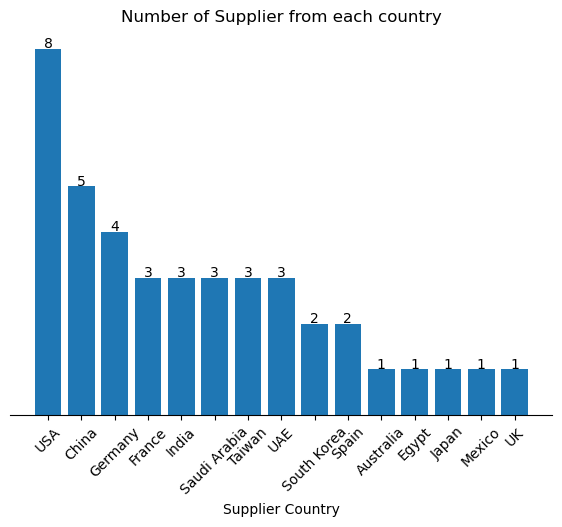

In [79]:
#plottig the number of suppliers from each country
fig, ax = plt.subplots(figsize=[7,5])
ax.bar(x=sup_country['Supplier Country'], height=sup_country['no_of_supplier'])

ax.yaxis.set_visible(False)
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.set_title('Number of Supplier from each country')
ax.set_xlabel('Supplier Country')
ax.set_ylabel('total quantity')
ax.tick_params(axis='x', rotation=45)
for index, values in enumerate(sup_country['no_of_supplier']):
    ax.annotate(values, xy=(index, values+0.1), ha='center', va='center')
    
plt.show()

- USA had the highest number of supplier

#### Top 10 Supplier with the most quantity of equipment supplied

In [80]:
#Supplier and total quantity of equipment supplied
top_10_supplier = df.groupby(['Supplier'], as_index=False).agg(total_equipments=('Quantity', 'sum')).sort_values('total_equipments', ascending=False).head(10)
top_10_supplier

,Supplier,total_equipments
20,NeoCare,163
2,CardiaTech,72
33,ScanTech,56
36,SurgiEquip,49
18,MedImaging,48
0,AnesthTech,39
32,RespTech,38
16,MRI Solutions,21
34,Sonoscan,16
9,FluoroTech,10


- NeoCare is the supplier with the highest quantity of equipment supplied

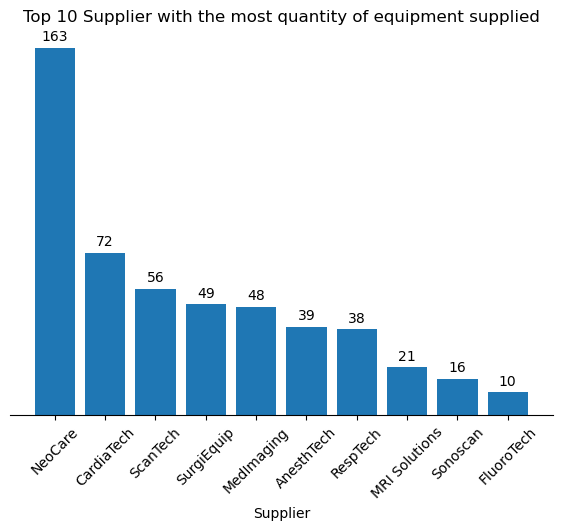

In [81]:
fig, ax = plt.subplots(figsize=[7,5])
ax.bar(x=top_10_supplier['Supplier'], height=top_10_supplier['total_equipments'])

ax.yaxis.set_visible(False)
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.set_title('Top 10 Supplier with the most quantity of equipment supplied')
ax.set_xlabel('Supplier')
ax.set_ylabel('total quantity')
ax.tick_params(axis='x', rotation=45)
for index, values in enumerate(top_10_supplier['total_equipments']):
    ax.annotate(values, xy=(index, values+5), ha='center', va='center')
    
plt.show()

In [82]:
#Assessing the Equipment type supplied by NeoCare
df[df['Supplier']=='NeoCare'].groupby(['Equipment'], as_index=False).agg(total_qty=('Quantity', 'sum')).sort_values('total_qty', ascending=False)

,Equipment,total_qty
2,Infant Incubator,61
4,Phototherapy Unit,51
3,Infant Warmers,43
1,Incubator,6
0,Fetal Monitor,2


- There are three major equipments supplied by NeoCare **Infant Incubator, Phototherapy Unit, Infant Incubator**

#### Number of Hospitals that Each supplier delivered equipment to

In [83]:
#Number of Hospitals that Each supplier delivered equipment to
df.groupby(['Supplier'], as_index=False).agg(no_of_hospitals_supplied=('Hospital', 'nunique')).sort_values('no_of_hospitals_supplied', ascending=False).head(10)

,Supplier,no_of_hospitals_supplied
20,NeoCare,27
18,MedImaging,17
36,SurgiEquip,17
32,RespTech,15
2,CardiaTech,13
0,AnesthTech,12
33,ScanTech,10
34,Sonoscan,9
16,MRI Solutions,7
9,FluoroTech,5


- NeoCare supplier had supplied equipment to about 27 different hospital

#### Supplier and their mean delivery time

In [84]:
#supplier and their mean delivery days
sup_delivery = df.groupby(['Supplier'], as_index=False).agg(avg_delivery_day=('Delivery Date (Days)', 'mean')).sort_values('avg_delivery_day', ascending=True)
sup_delivery

,Supplier,avg_delivery_day
1,BioTech,23.000000
30,RadiantTech,23.000000
6,DermiCare,23.000000
7,ENT Solutions,23.000000
8,EyeTech,23.000000
17,MammoTech,23.000000
0,AnesthTech,23.125000
34,Sonoscan,23.454545
36,SurgiEquip,24.125000
27,PsychiCare,24.500000


#### Supplier and number of unique equipments they supplied

In [88]:
#group by supplier and number of unique equipment the supplied
df.groupby(['Supplier'], as_index=False).agg(no_of_unique_equipments=('Equipment', 'nunique')).sort_values('no_of_unique_equipments', ascending=False)

,Supplier,no_of_unique_equipments
36,SurgiEquip,6
20,NeoCare,5
13,HemoTech,4
26,OrthoTech,3
10,GastroTech,3
23,NeuroTech,3
3,CardioCare,3
32,RespTech,2
18,MedImaging,2
34,Sonoscan,2


#### Categorizing supplier based on type of equipment supplied

In [90]:
#group equipment by number of supplier
df.groupby(['Equipment'], as_index=False).agg(total_supplier=('Supplier', 'nunique')).sort_values('total_supplier', ascending=False).transpose()

,17,40,8,19,63,37,38,39,36,49,42,43,44,45,46,47,48,41,0,34,50,51,52,53,54,55,56,57,58,59,60,61,62,35,32,33,1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,18,20,21,22,23,24,25,26,27,28,29,30,31,64
Equipment,Defibrillator,MRI Machine,CT Scanner,ECG Machine,Ventilator,Linear Accelerator,Lithotripsy Machine,Lithotripter,Laser Machine,Psychiatric Ward,Microscope,Neuroendoscope,Operating Table,Otoscope,Oxygen Concentrator,Phototherapy Unit,Psychiatric Bed,Mammography Machine,Anesthesia Machine,Infant Incubator,Radiation Machine,Rhinolaryngoscope,Spirometer,Sterilization Equipment,Stress Test System,Surgical Lights,Surgical Microscope,Surgical Suction Machine,Surgical Tools,TCD Machine,Traction Table,Ultrasound,Ultrasound Machine,Infant Warmers,Hysteroscope,Incubator,Audiometer,Blood Analyzer,Blood Bank Refrigerator,Bone Densitometer,C-Arm Machine,C-arm Fluoroscopy,CPAP Machine,Cast Cutter,Cautery Machine,Chemotherapy Pump,Coagulation Analyzer,Colonoscope,Colposcope,Cryotherapy Machine,Cystoscope,Dialysis Machine,EEG Machine,EMG Machine,Echocardiogram,Electrosurgical Unit,Endoscope,Endoscopy Machine,Fetal Monitor,Fundus Camera,Gastroscope,Hematology Analyzer,Hemoglobin Analyzer,Holter Monitor,X-ray Machine
total_supplier,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


- Only five equipments **('Defibrillator', 'MRI Machine', 'CT Scanner', 'ECG Machine', 'Ventilator')** have two different suppliers, the rest had only one supplier

### Evaluating Suppliers mean delivery, performance, cost and condition of equipment

- Since there are only five equipments with more than one supplier, analysis will be on the suppliers of these equipments

#### Creating a dataframe of equipment with two kind of suppliers

In [155]:
#Extracting dataframe for Equipment with two suppliers
two_equ = df[df['Equipment'].isin(['Defibrillator', 'MRI Machine', 'CT Scanner', 'ECG Machine', 'Ventilator'])]

In [156]:
#group by Equipment, supplier and total number of equipments supplied
mm = two_equ.groupby(['Equipment', 'Supplier'], as_index=False).agg(total_equipment=('Quantity', 'sum')).sort_values(['Equipment', 'total_equipment'], ascending=[True, False])
mm

,Equipment,Supplier,total_equipment
1,CT Scanner,ScanTech,56
0,CT Scanner,RadiantTech,1
2,Defibrillator,CardiaTech,72
3,Defibrillator,LifeSaver,3
5,ECG Machine,MedTech Inc.,2
4,ECG Machine,CardioCare,1
7,MRI Machine,MRI Solutions,21
6,MRI Machine,Imagix,3
9,Ventilator,RespTech,35
8,Ventilator,RespCare,5


In [157]:
#create a new column with combine name
mm['equipment-supplier'] = mm['Supplier'] + ' ' + '('+mm['Equipment']+')'

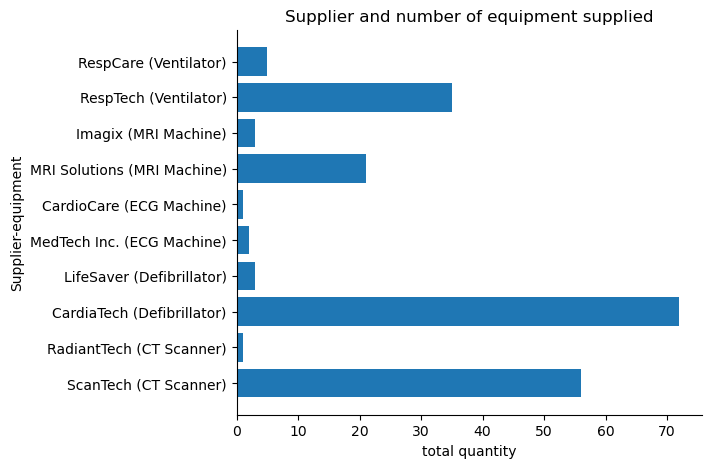

In [158]:
#plot a bar chart of the supplier and number of equipment
fig, ax = plt.subplots(figsize=[6,5])
ax.barh(y=mm['equipment-supplier'], width=mm['total_equipment'])

ax.tick_params(axis='x', rotation=0)
ax.set_ylabel('Supplier-equipment')
ax.set_xlabel('total quantity')
#ax.yaxis.set_visible(False)
ax.spines[['top', 'right']].set_visible(False)
ax.set_title('Supplier and number of equipment supplied')

#for index, value in enumerate(mm['total_equipment']):
    #ax.annotate(value, xy=(index, value+2), ha='center', va='center')
plt.show()

#### Evaluating suppliers for their mean delivery time

In [159]:
#analyzing the mean delivery time for the suppliers 
mm2 = two_equ.groupby(['Equipment', 'Supplier'], as_index=False).agg(avg_delivery=('Delivery Date (Days)', 'mean')).sort_values(['Equipment', 'avg_delivery'], ascending=[True, True])
mm2

,Equipment,Supplier,avg_delivery
0,CT Scanner,RadiantTech,23.000000
1,CT Scanner,ScanTech,24.833333
2,Defibrillator,CardiaTech,25.631579
3,Defibrillator,LifeSaver,26.000000
4,ECG Machine,CardioCare,26.000000
5,ECG Machine,MedTech Inc.,26.000000
6,MRI Machine,Imagix,26.333333
7,MRI Machine,MRI Solutions,29.000000
8,Ventilator,RespCare,24.500000
9,Ventilator,RespTech,26.000000


#### Evaluating Supplier for the unit price

In [160]:
# Evaluating Supplier for the unit price
mm3 = two_equ.groupby(['Equipment', 'Supplier'], as_index=False).agg(Unit_Price = ('Unit Price (USD)', 'unique'))
mm3

,Equipment,Supplier,Unit_Price
0,CT Scanner,RadiantTech,[200000]
1,CT Scanner,ScanTech,[80000]
2,Defibrillator,CardiaTech,[10000]
3,Defibrillator,LifeSaver,[5000]
4,ECG Machine,CardioCare,[8000]
5,ECG Machine,MedTech Inc.,[5000]
6,MRI Machine,Imagix,"[150000, 500000]"
7,MRI Machine,MRI Solutions,[200000]
8,Ventilator,RespCare,"[10000, 25000]"
9,Ventilator,RespTech,[40000]


#### Evaluating Supplier for the condition of equipment supplied

In [161]:
# Evaluating Supplier for the condition of equipment supplied
mm4 = two_equ.groupby(['Equipment', 'Supplier'], as_index=False).agg(Equipment_condition = ('Equipment Condition', 'unique'))
mm4

,Equipment,Supplier,Equipment_condition
0,CT Scanner,RadiantTech,[New]
1,CT Scanner,ScanTech,[New]
2,Defibrillator,CardiaTech,[New]
3,Defibrillator,LifeSaver,[New]
4,ECG Machine,CardioCare,[Used - Good]
5,ECG Machine,MedTech Inc.,[New]
6,MRI Machine,Imagix,[New]
7,MRI Machine,MRI Solutions,[New]
8,Ventilator,RespCare,[Refurbished]
9,Ventilator,RespTech,[New]


In [162]:
# Evaluating Supplier for the warranty of equipment supplied
mm5 = two_equ.groupby(['Equipment', 'Supplier'], as_index=False).agg(Warranty = ('Warranty Period (Months)', 'unique'))
mm5

,Equipment,Supplier,Warranty
0,CT Scanner,RadiantTech,[48]
1,CT Scanner,ScanTech,[60]
2,Defibrillator,CardiaTech,[36]
3,Defibrillator,LifeSaver,[24]
4,ECG Machine,CardioCare,[36]
5,ECG Machine,MedTech Inc.,[24]
6,MRI Machine,Imagix,"[36, 48]"
7,MRI Machine,MRI Solutions,[60]
8,Ventilator,RespCare,"[24, 36]"
9,Ventilator,RespTech,[48]


In [166]:
# Evaluating Supplier for their maintenance cost
mm6 = two_equ.groupby(['Equipment', 'Supplier'], as_index=False).agg(Maintenance_Cost = ('Maintenance Cost (USD/year)', 'unique'))
mm6

,Equipment,Supplier,Maintenance_Cost
0,CT Scanner,RadiantTech,[5000]
1,CT Scanner,ScanTech,[3000]
2,Defibrillator,CardiaTech,[1200]
3,Defibrillator,LifeSaver,[1000]
4,ECG Machine,CardioCare,[1000]
5,ECG Machine,MedTech Inc.,[1000]
6,MRI Machine,Imagix,"[2000, 5000]"
7,MRI Machine,MRI Solutions,[5000]
8,Ventilator,RespCare,[1500]
9,Ventilator,RespTech,[2000]


In [167]:
# Evaluating Supplier for their installation cost
mm7 = two_equ.groupby(['Equipment', 'Supplier'], as_index=False).agg(Installation_Cost = ('Installation Cost (USD)', 'unique'))
mm7

,Equipment,Supplier,Installation_Cost
0,CT Scanner,RadiantTech,[3000]
1,CT Scanner,ScanTech,[2000]
2,Defibrillator,CardiaTech,[800]
3,Defibrillator,LifeSaver,[500]
4,ECG Machine,CardioCare,[500]
5,ECG Machine,MedTech Inc.,[500]
6,MRI Machine,Imagix,"[1000, 3000]"
7,MRI Machine,MRI Solutions,[3000]
8,Ventilator,RespCare,"[800, 1000]"
9,Ventilator,RespTech,[1200]


In [204]:
#merging the tables together
merged_two = mm.merge(mm2, on=['Equipment', 'Supplier']).merge(mm3, on=['Equipment', 'Supplier']).merge(mm4, on=['Equipment', 'Supplier']).merge(mm5, on=['Equipment', 'Supplier']).merge(mm6, on=['Equipment', 'Supplier']).merge(mm7, on=['Equipment', 'Supplier'])
merged_two

,Equipment,Supplier,total_equipment,equipment-supplier,avg_delivery,Unit_Price,Equipment_condition,Warranty,Maintenance_Cost,Installation_Cost
0,CT Scanner,ScanTech,56,ScanTech (CT Scanner),24.833333,[80000],[New],[60],[3000],[2000]
1,CT Scanner,RadiantTech,1,RadiantTech (CT Scanner),23.000000,[200000],[New],[48],[5000],[3000]
2,Defibrillator,CardiaTech,72,CardiaTech (Defibrillator),25.631579,[10000],[New],[36],[1200],[800]
3,Defibrillator,LifeSaver,3,LifeSaver (Defibrillator),26.000000,[5000],[New],[24],[1000],[500]
4,ECG Machine,MedTech Inc.,2,MedTech Inc. (ECG Machine),26.000000,[5000],[New],[24],[1000],[500]
5,ECG Machine,CardioCare,1,CardioCare (ECG Machine),26.000000,[8000],[Used - Good],[36],[1000],[500]
6,MRI Machine,MRI Solutions,21,MRI Solutions (MRI Machine),29.000000,[200000],[New],[60],[5000],[3000]
7,MRI Machine,Imagix,3,Imagix (MRI Machine),26.333333,"[150000, 500000]",[New],"[36, 48]","[2000, 5000]","[1000, 3000]"
8,Ventilator,RespTech,35,RespTech (Ventilator),26.000000,[40000],[New],[48],[2000],[1200]
9,Ventilator,RespCare,5,RespCare (Ventilator),24.500000,"[10000, 25000]",[Refurbished],"[24, 36]",[1500],"[800, 1000]"


### Equipment Analysis

##### Total number of unique equipments

In [89]:
#total number of unique equipments
df.Equipment.nunique()

65

In [188]:
two_equ[['Equipment', 'Supplier', 'Unit Price (USD)']].sort_values('Equipment', ascending=True).groupby(['Equipment', 'Supplier'], as_index=False).agg(price=('Unit Price (USD)', 'mean'))

,Equipment,Supplier,price
0,CT Scanner,RadiantTech,200000.000000
1,CT Scanner,ScanTech,80000.000000
2,Defibrillator,CardiaTech,10000.000000
3,Defibrillator,LifeSaver,5000.000000
4,ECG Machine,CardioCare,8000.000000
5,ECG Machine,MedTech Inc.,5000.000000
6,MRI Machine,Imagix,338333.333333
7,MRI Machine,MRI Solutions,200000.000000
8,Ventilator,RespCare,17500.000000
9,Ventilator,RespTech,40000.000000


#### High Cost Equipment and where are they purchased and condition of the equipment

#### Total equipment procured

In [190]:
#total equipment procured
qty_equipment = df.Quantity.sum()
qty_equipment

612

In [301]:
#top 10 most purchased equipment by type of equipment
top_10_equ = df.groupby(['Equipment'], as_index=False).agg(total_qty=('Quantity', 'sum')).sort_values('total_qty', ascending=False).head(10)
top_10_equ

,Equipment,total_qty
17,Defibrillator,75
34,Infant Incubator,61
8,CT Scanner,57
47,Phototherapy Unit,51
64,X-ray Machine,47
35,Infant Warmers,43
44,Operating Table,42
63,Ventilator,40
0,Anesthesia Machine,39
40,MRI Machine,24


In [302]:
df.columns

Index(['Serial No', 'Hospital', 'State', 'Location', 'Department', 'Equipment',
       'Quantity', 'Unit Price (USD)', 'Supplier', 'Supplier Contact',
       'Supplier Phone', 'Supplier Email', 'Supplier Country', 'Date Ordered',
       'Date Delivered', 'Warranty Period (Months)',
       'Maintenance Cost (USD/year)', 'Installation Cost (USD)',
       'Equipment Condition', 'Delivery Date (Days)', 'Total Cost'],
      dtype='object')

- The top five most procured equipment are **Defibrillator, Infant Incubator, CT Scanner, Phototherapy Unit and X-ray Machine**

In [228]:
two_equ = df[df['Equipment'].isin(['Defibrillator', 'MRI Machine', 'CT Scanner', 'ECG Machine', 'Ventilator'])]

#### Condition of Equipment Supplied

In [238]:
#quantity of equipment supplied based on condition of the equipment
equ_condition = df.groupby(['Equipment Condition'], as_index=False).agg(total_qty=('Quantity', 'sum'))
equ_condition

,Equipment Condition,total_qty
0,New,295
1,Refurbished,77
2,Used - Fair,18
3,Used - Good,222


In [239]:
#add percentage to each equipment condition 
tot = equ_condition['total_qty'].sum()
equ_condition['percentage'] = ((equ_condition['total_qty']/tot)*100).round(1)

In [240]:
equ_condition

,Equipment Condition,total_qty,percentage
0,New,295,48.2
1,Refurbished,77,12.6
2,Used - Fair,18,2.9
3,Used - Good,222,36.3


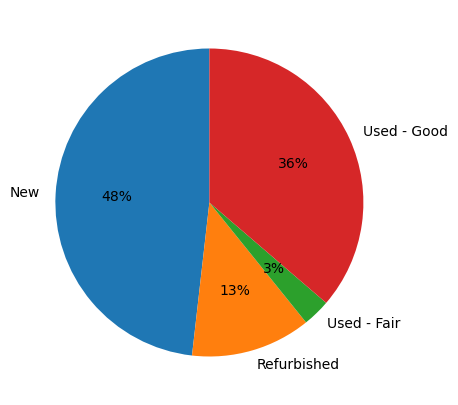

In [300]:
fig, ax = plt.subplots(figsize=[7,5])
ax.pie(x=equ_condition['percentage'], labels=equ_condition['Equipment Condition'], startangle=90, autopct='%.0f%%')

plt.show()

In [257]:
#saving the csv file
df.to_csv('hospital_procurement_cleaned.csv', index=False)

## Analysis of Data

### Which country do we buy mostly from?

In [258]:
df.head(2)

,Serial No,Hospital,State,Location,Department,Equipment,Quantity,Unit Price (USD),Supplier,Supplier Contact,Supplier Phone,Supplier Email,Supplier Country,Date Ordered,Date Delivered,Warranty Period (Months),Maintenance Cost (USD/year),Installation Cost (USD),Equipment Condition,Delivery Date (Days),Total Cost
1,1,Lagos General,Lagos,Lagos City,Cardiology,ECG Machine,2,5000,MedTech Inc.,John Doe,+1234567890,john@medtech.com,USA,2024-03-15,2024-04-10,24,1000,500,New,26,10000
2,2,Abuja Hospital,Abuja,Abuja City,Radiology,MRI Machine,1,150000,Imagix,Jane Smith,+9876543210,jane@imagix.co.uk,UK,2024-02-20,2024-03-18,36,2000,1000,New,27,15000


In [270]:
#group the data by country and count quantity of equipment purchased
country_equ = df.groupby(['Supplier Country'], as_index=False).agg(total_qty=('Quantity', 'sum')).sort_values('total_qty', ascending=False)
country_equ

,Supplier Country,total_qty
0,Australia,163
14,USA,118
12,UAE,94
4,Germany,60
3,France,59
1,China,53
6,Japan,16
11,Taiwan,12
10,Spain,10
8,Saudi Arabia,7


- it appears that majority of the equipment were purchased from **Australia**

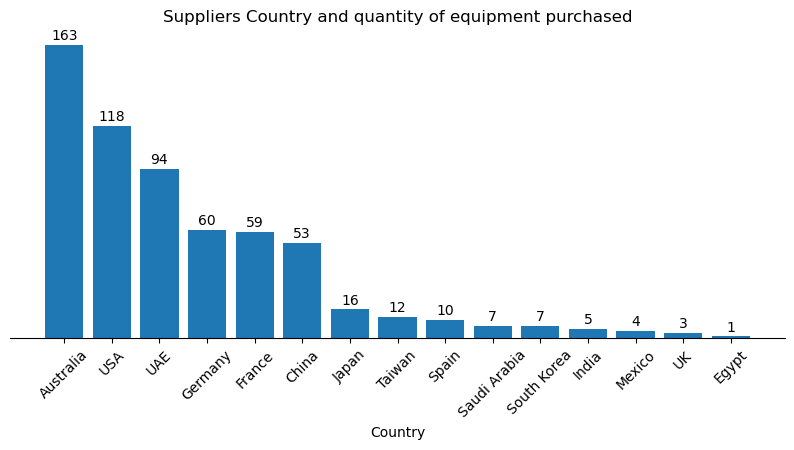

In [284]:
fig, ax = plt.subplots(1,1, figsize=[10,4])

ax.bar(x=country_equ['Supplier Country'], height=country_equ['total_qty'])

ax.yaxis.set_visible(False)
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.set_title('Suppliers Country and quantity of equipment purchased')
ax.set_xlabel('Country')
ax.set_ylabel('total quantity purchased')
ax.tick_params(axis='x', rotation=45)
for index, values in enumerate(country_equ['total_qty']):
    ax.annotate(values, xy=(index, values+5), ha='center', va='center')

plt.show()

In [269]:
#group by country and type of equipment and count the no of equipment purchased
df.groupby(['Supplier Country', 'Equipment']).agg(total_qty=('Quantity', 'sum')).sort_values(['Supplier Country', 'total_qty'], ascending =[1,0])

total_qty
Supplier Country Equipment                     
Australia        Infant Incubator            61
                 Phototherapy Unit           51
                 Infant Warmers              43
                 Incubator                    6
                 Fetal Monitor                2
...                                         ...
USA              Blood Analyzer               2
                 Echocardiogram               2
                 Stress Test System           2
                 Audiometer                   1
                 Hemoglobin Analyzer          1

[67 rows x 1 columns]

In [291]:
#group by country and number of unique type of equipment purchased
df.groupby(['Supplier Country'], as_index=False).agg(no_unique_equipment=('Equipment', 'nunique')).sort_values('no_unique_equipment', ascending=False)

,Supplier Country,no_unique_equipment
14,USA,11
12,UAE,9
3,France,7
1,China,6
0,Australia,5
8,Saudi Arabia,5
10,Spain,5
5,India,4
4,Germany,3
9,South Korea,3


In [292]:
df[df['Supplier Country']=='USA'].groupby(['Equipment'], as_index=False).agg(tot=('Quantity', 'sum'))

,Equipment,tot
0,Audiometer,1
1,Blood Analyzer,2
2,Coagulation Analyzer,3
3,Defibrillator,75
4,ECG Machine,3
5,Echocardiogram,2
6,Hematology Analyzer,4
7,Hemoglobin Analyzer,1
8,Holter Monitor,4
9,MRI Machine,21
